# Importing the Libraries and Data 

In [28]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

data = pd.read_csv('output.csv')
data

,Index,Elapsed Time,Action,Latency
0,1,479,Login,479
1,2,243,QueryFlight,243
2,3,244,QueryFlight,244
3,4,248,QueryFlight,248
4,5,242,QueryFlight,241
...,...,...,...,...
445,446,247,QueryFlight,246
446,447,265,QueryFlight,265
447,448,244,QueryFlight,244
448,449,245,List Bookings,245


# Plotting the Latency with the response number

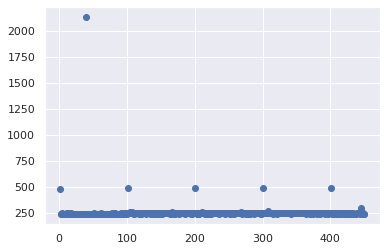

In [29]:
plt.scatter(data['Index'], data['Latency'])
plt.show()

# Fitting the K-Means Model

In [30]:
x = data.iloc[:,[0,3]]

print(x)

kmeans = KMeans(5)
kmeans.fit(x)

     Index  Latency
0        1      479
1        2      243
2        3      244
3        4      248
4        5      241
..     ...      ...
445    446      246
446    447      265
447    448      244
448    449      245
449    450      242

[450 rows x 2 columns]


KMeans(n_clusters=5)

# Plotting the Result

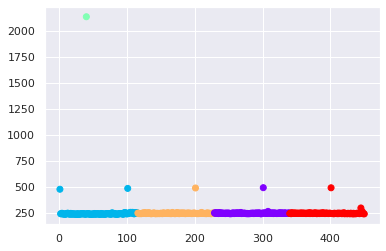

In [31]:
clusters = kmeans.fit_predict(x)
clusters

data_clusters = data.copy()
data_clusters['Clusters'] = clusters 
plt.scatter(data_clusters['Index'],data_clusters['Latency'],c=data_clusters['Clusters'],cmap='rainbow')

# Plotting the Errors with different K values

Text(0, 0.5, 'Error')

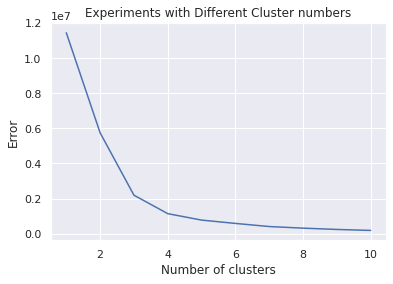

In [32]:
error=[]
for i in range(1,11):
  kmeans = KMeans(i)
  kmeans.fit(x)
  error_iter = kmeans.inertia_
  error.append(error_iter)

number_clusters = range(1,11)
plt.plot(number_clusters,error)
plt.title('Experiments with Different Cluster numbers')
plt.xlabel('Number of clusters')
plt.ylabel('Error')